In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from datetime import datetime
import re 
from collections import Counter

In [28]:
# Load dataset
df = pd.read_csv("E:/Git_repo/Medical_Business_DataWarehouse/four_telegram_data.csv", encoding="latin1")

# Display basic info
print("Initial Data Overview:")
print(df.info())
print(df.head())

Initial Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3435 entries, 0 to 3434
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Channel Title     3435 non-null   object
 1   Channel Username  3435 non-null   object
 2   ID                3435 non-null   int64 
 3   Message           2673 non-null   object
 4   Date              3435 non-null   object
 5   Media Path        2525 non-null   object
dtypes: int64(1), object(5)
memory usage: 161.1+ KB
None
                                       Channel Title Channel Username    ID  \
0  ETHIO-AMERICAN MEDICAL TRAININGS( CPD ) & HEAL...           @EAHCI  2609   
1  ETHIO-AMERICAN MEDICAL TRAININGS( CPD ) & HEAL...           @EAHCI  2608   
2  ETHIO-AMERICAN MEDICAL TRAININGS( CPD ) & HEAL...           @EAHCI  2607   
3  ETHIO-AMERICAN MEDICAL TRAININGS( CPD ) & HEAL...           @EAHCI  2606   
4  ETHIO-AMERICAN MEDICAL TRAININGS( CPD ) & HEAL..

In [29]:
# Convert date column to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [30]:
# Drop rows where Date could not be parsed
df = df.dropna(subset=['Date'])

In [31]:
# Drop duplicates
df = df.drop_duplicates()

In [32]:
# Fill missing messages with empty strings
df['Message'] = df['Message'].fillna("")

In [33]:
# Function to clean message text
def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # Remove special characters
    text = text.lower()  # Convert to lowercase
    return text

df['Cleaned_Message'] = df['Message'].apply(clean_text)

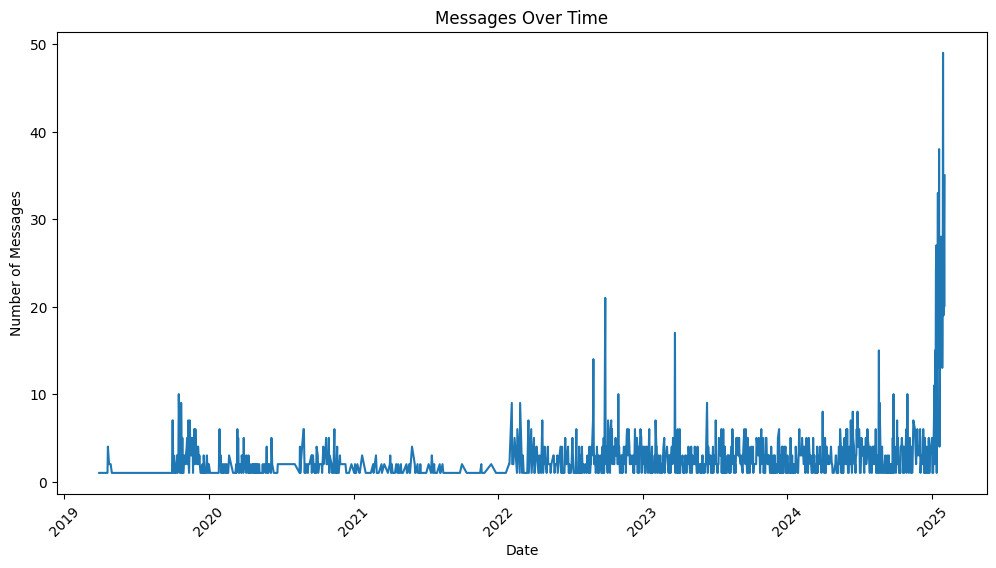

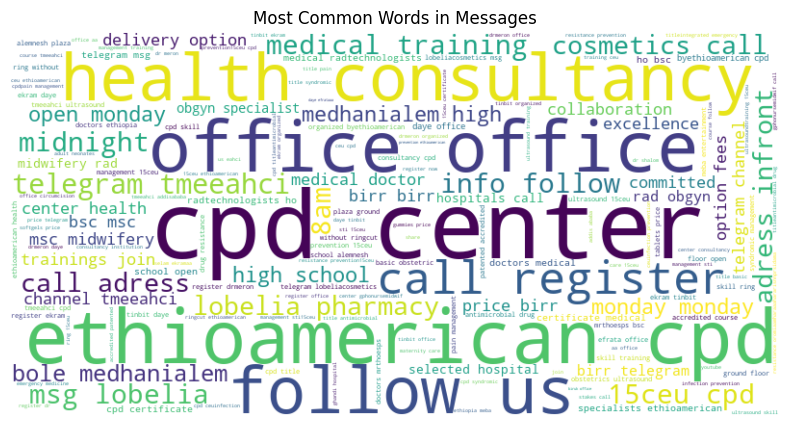

e:\Git_repo\Medical_Business_DataWarehouse\dwvenv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 139 (\x8b) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
e:\Git_repo\Medical_Business_DataWarehouse\dwvenv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 140 (\x8c) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
e:\Git_repo\Medical_Business_DataWarehouse\dwvenv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 138 (\x8a) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
e:\Git_repo\Medical_Business_DataWarehouse\dwvenv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 147 (\x93) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
e:\Git_repo\Medical_Business_DataWarehouse\dwvenv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 136 (\x88) missing from font(s) DejaVu Sans.
  fig.canvas

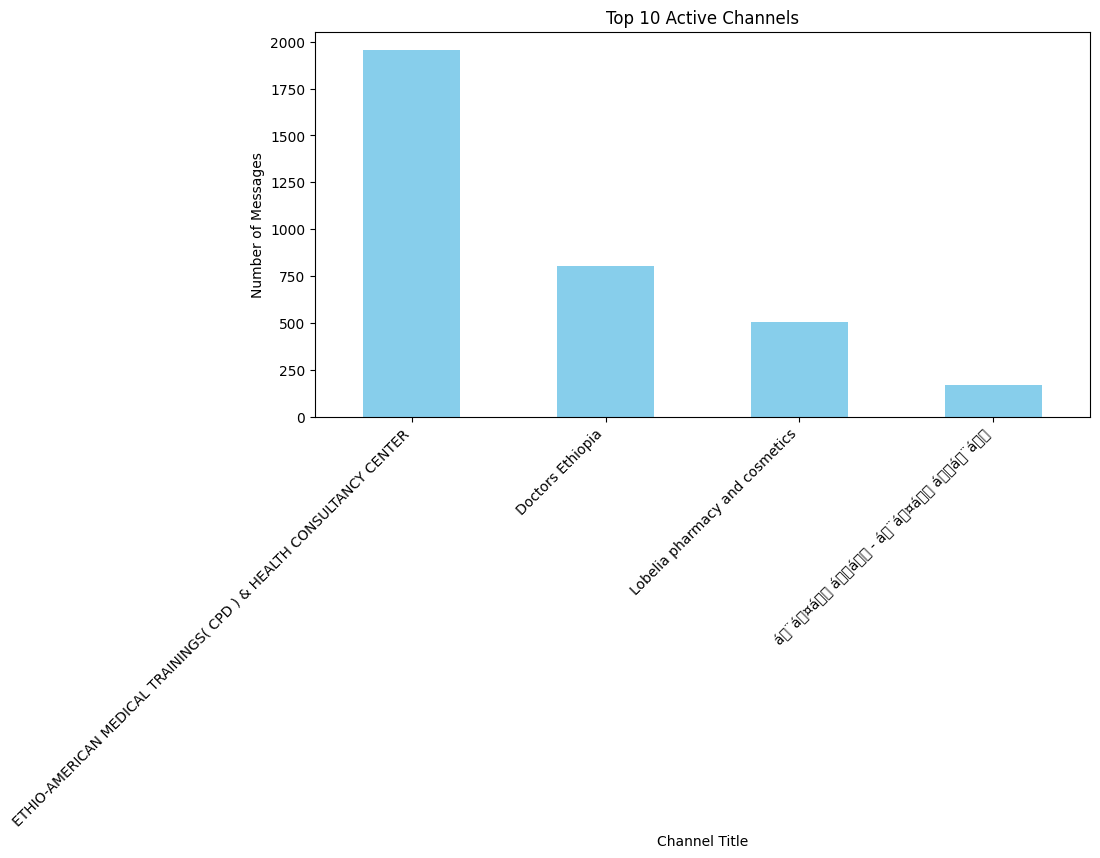

Data Cleaning and EDA Completed. Cleaned data saved to 'cleaned_telegram_data.csv'


In [35]:
# Plot message frequency over time
plt.figure(figsize=(12, 6))
df['Date'].dt.date.value_counts().sort_index().plot(kind='line')
plt.title('Messages Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Messages')
plt.xticks(rotation=45)
plt.show()

# Word Cloud of most common words
all_text = ' '.join(df['Cleaned_Message'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Common Words in Messages")
plt.show()

# Top active channels
plt.figure(figsize=(10, 5))
df['Channel Title'].value_counts().nlargest(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Active Channels')
plt.xlabel('Channel Title')
plt.ylabel('Number of Messages')
plt.xticks(rotation=45, ha='right')  # Align labels to the right
plt.show()

# Save cleaned data
df.to_csv("cleaned_telegram_data.csv", index=False)
print("Data Cleaning and EDA Completed. Cleaned data saved to 'cleaned_telegram_data.csv'")
